In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import pandas as pd
import numpy as np
import re
import string
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print(check_output(["ls", "./"]).decode("utf8"))

Sheet_1.csv
Sheet_2.csv
text_clasification_chatbot.ipynb
text-classification-chatbot.xpynb



In [6]:
chatbot = pd.read_csv("./Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv("./Sheet_2.csv",encoding='latin-1')

In [7]:
chatbot.head(5)

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [8]:
chatbot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

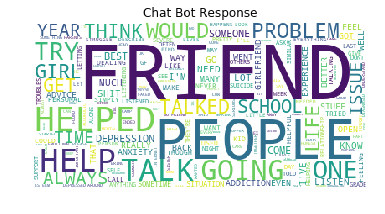

In [10]:


def cloud(text):
    wordcloud = WordCloud(background_color="white",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(chatbot['response_text'])



In [11]:
chatbot['Label'] = Encode.fit_transform(chatbot['class'])

In [12]:
chatbot['Label'].value_counts()

1    55
0    25
Name: Label, dtype: int64

In [13]:
x = chatbot.response_text
y = chatbot.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.7

In [16]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

/home/rajesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



0.75

In [17]:
Chatbot_Text = chatbot["response_text"]
len(Chatbot_Text)

80

In [18]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(Chatbot_Text.values)

In [21]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.003s...
[t-SNE] Computed neighbors for 80 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119037
[t-SNE] Computed conditional probabilities in 0.079s
[t-SNE] Iteration 50: error = 118.1419601, gradient norm = 0.1454061 (50 iterations in 0.063s)
[t-SNE] Iteration 100: error = 133.4549408, gradient norm = 0.1050430 (50 iterations in 0.049s)
[t-SNE] Iteration 150: error = 143.9093933, gradient norm = 0.1021760 (50 iterations in 0.056s)
[t-SNE] Iteration 200: error = 143.0787354, gradient norm = 0.0821203 (50 iterations in 0.052s)
[t-SNE] Iteration 250: error = 144.1563568, gradient norm = 0.0570332 (50 iterations in 0.048s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 144.156357
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382

In [24]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = Chatbot_Text.values,
        colorscale = 'Portland',
        colorbar = dict(title = 'TExt'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

ValueError: 
    Invalid element(s) received for the 'color' property of scatter3d.marker
        Invalid elements include: ['I try and avoid this sort of conflict', 'Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed', 'I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.', 'i cant think of one really...i think i may have indirectly', 'Only really one friend who doesn\'t fit into the any of the above categories. Her therapist calls it spiraling." Anyway she pretty much calls me any time she is frustrated by something with  her boyfriend to ask me if it\'s logical or not. Before they would just fight and he would call her crazy. Now she asks me if it\'s ok he didn\'t say "please" when he said  "hand me the remote."', 'a couple of years ago my friends was going to switch school because of low self esteem too. I helped him overcome that shit too', 'Roommate when he was going through death and loss of a gf. Did anything to get him out of his bedroom.', "i've had a couple of friends (you could say more than friends) with quite severe depression/ emotional problems. i helped for a while but eventually both relationships started to suffer as a result of both our personal problems", 'Listened to someone talk about relationship troubles. Offered some advice from personal experience.', 'I will always listen. I comforted my sister when she lost her virgity the same night she walked in on her boyfriend cutting himself, and then our parents found out she threw a house part. Simply bring supportive was my focus.']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter3d.marker.colorscale
      - A list or array of any of the above